# PHÂN TÍCH ĐIỂM CỦA HỌC SINH VỚI PYTHON

### 1. Xử lý dữ liệu

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
data = pd.read_csv(r"student_data.csv").drop('Unnamed: 0', axis=1)
data.head(5)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,10-May,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,10-May,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,10-May,76,78,75


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


Check dupilicate and null values:

In [42]:
z = data.duplicated().sum()
z

0

In [43]:
for col in data.columns:
    print('Null in column {} is {}%'.format(col,
        np.round(data[col].isna().sum()*100 / len(data[col]) ) ))

Null in column Gender is 0.0%
Null in column EthnicGroup is 6.0%
Null in column ParentEduc is 6.0%
Null in column LunchType is 0.0%
Null in column TestPrep is 6.0%
Null in column ParentMaritalStatus is 4.0%
Null in column PracticeSport is 2.0%
Null in column IsFirstChild is 3.0%
Null in column NrSiblings is 5.0%
Null in column TransportMeans is 10.0%
Null in column WklyStudyHours is 3.0%
Null in column MathScore is 0.0%
Null in column ReadingScore is 0.0%
Null in column WritingScore is 0.0%


In [44]:
#Process null values
data = data.apply(lambda x: x.fillna(x.value_counts().index[0]))
z = data.isna().sum().sum()
z

0

In [45]:
for column in data.columns:
    num_distinct_values = data[column].unique()
    print(f"{column}: {num_distinct_values}" )

Gender: ['female' 'male']
EthnicGroup: ['group C' 'group B' 'group A' 'group D' 'group E']
ParentEduc: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
LunchType: ['standard' 'free/reduced']
TestPrep: ['none' 'completed']
ParentMaritalStatus: ['married' 'single' 'widowed' 'divorced']
PracticeSport: ['regularly' 'sometimes' 'never']
IsFirstChild: ['yes' 'no']
NrSiblings: [3. 0. 4. 1. 2. 5. 7. 6.]
TransportMeans: ['school_bus' 'private']
WklyStudyHours: ['< 5' '10-May' '> 10']
MathScore: [ 71  69  87  45  76  73  85  41  65  37  58  40  66  80  48  88  18  46
  50  42  74  75  70  63  56  97  81  51  77  53  59  60  67  82  54  33
  84  52  61   0  39  62  64  47  44  28  49  57  27  68  79 100  72  98
  55  90  86  89  21  96  91  99  83  35  43  93  78  94  36  29  23  92
  26  38  95  30  32   8  34  31  25  22  17  20  16  19  24  15  11  12
  13   9  10   7  14]
ReadingScore: [ 71  90  93  56  78  84  43  64  59  54  52  8

In [46]:
#change label
parent_mapping = {
    "master's degree" : 'master',
    "bachelor's degree" : 'bachelor',
    "associate's degree" : 'associate',
    'some college' : 'college',
    'high school' : 'high school',
    'some high school' : 'high school'
}

data['ParentEduc'] = data['ParentEduc'].map(parent_mapping)

data['WklyStudyHours'].replace('10-May', '5-10', inplace=True)
data.head(5)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,group C,bachelor,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,college,standard,none,married,sometimes,yes,0.0,school_bus,5-10,69,90,88
2,female,group B,master,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate,free/reduced,none,married,never,no,1.0,school_bus,5-10,45,56,42
4,male,group C,college,standard,none,married,sometimes,yes,0.0,school_bus,5-10,76,78,75


### 2. Correlation matrix

Map data

In [47]:
value_mapping = {
    'no': 0,
    'yes': 1
}

test_mapping = {
    'none': 0,
    'completed': 1
}

bus_mapping = {
    'private': 0,
    'school_bus': 1
}

# fixing the values
data['IsFirstChild'] = data['IsFirstChild'].map(value_mapping)
data['TestPrep'] = data['TestPrep'].map(test_mapping)
data['TransportMeans'] = data['TransportMeans'].map(bus_mapping)

# rename
data.rename(columns={'TransportMeans': 'School_Bus'}, inplace=True)

data.head(5)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,School_Bus,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,group C,bachelor,standard,0,married,regularly,1,3.0,1,< 5,71,71,74
1,female,group C,college,standard,0,married,sometimes,1,0.0,1,5-10,69,90,88
2,female,group B,master,standard,0,single,sometimes,1,4.0,1,< 5,87,93,91
3,male,group A,associate,free/reduced,0,married,never,0,1.0,1,5-10,45,56,42
4,male,group C,college,standard,0,married,sometimes,1,0.0,1,5-10,76,78,75


In [48]:
# Define the function for one-hot encoding copied from google:)
def perform_one_hot_encoding(df, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df[column_name], prefix=column_name)

    # Drop the original column and append the new dummy columns to the dataframe
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)

    return df


Create a correlation matrix

In [49]:
#encoding

data2 = data.copy()

for column in ['Gender', 'EthnicGroup', 'LunchType', 'ParentMaritalStatus', 'WklyStudyHours']:
    data2 = perform_one_hot_encoding(data2, column)

data2 = data2.drop('ParentEduc', axis=1)
data2 = data2.drop('PracticeSport', axis=1)


In [50]:
data2

,TestPrep,IsFirstChild,NrSiblings,School_Bus,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,EthnicGroup_group A,...,EthnicGroup_group E,LunchType_free/reduced,LunchType_standard,ParentMaritalStatus_divorced,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,WklyStudyHours_5-10,WklyStudyHours_< 5,WklyStudyHours_> 10
0,0,1,3.0,1,71,71,74,True,False,False,...,False,False,True,False,True,False,False,False,True,False
1,0,1,0.0,1,69,90,88,True,False,False,...,False,False,True,False,True,False,False,True,False,False
2,0,1,4.0,1,87,93,91,True,False,False,...,False,False,True,False,False,True,False,False,True,False
3,0,0,1.0,1,45,56,42,False,True,True,...,False,True,False,False,True,False,False,True,False,False
4,0,1,0.0,1,76,78,75,False,True,False,...,False,False,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,0,0,2.0,1,59,61,65,True,False,False,...,False,False,True,False,False,True,False,True,False,False
30637,0,0,1.0,0,58,53,51,False,True,False,...,True,False,True,False,False,True,False,True,False,False
30638,1,0,1.0,0,61,70,67,True,False,False,...,False,True,False,False,True,False,False,True,False,False
30639,1,0,3.0,1,82,90,93,True,False,False,...,False,False,True,False,True,False,False,True,False,False


In [51]:
import seaborn as sns

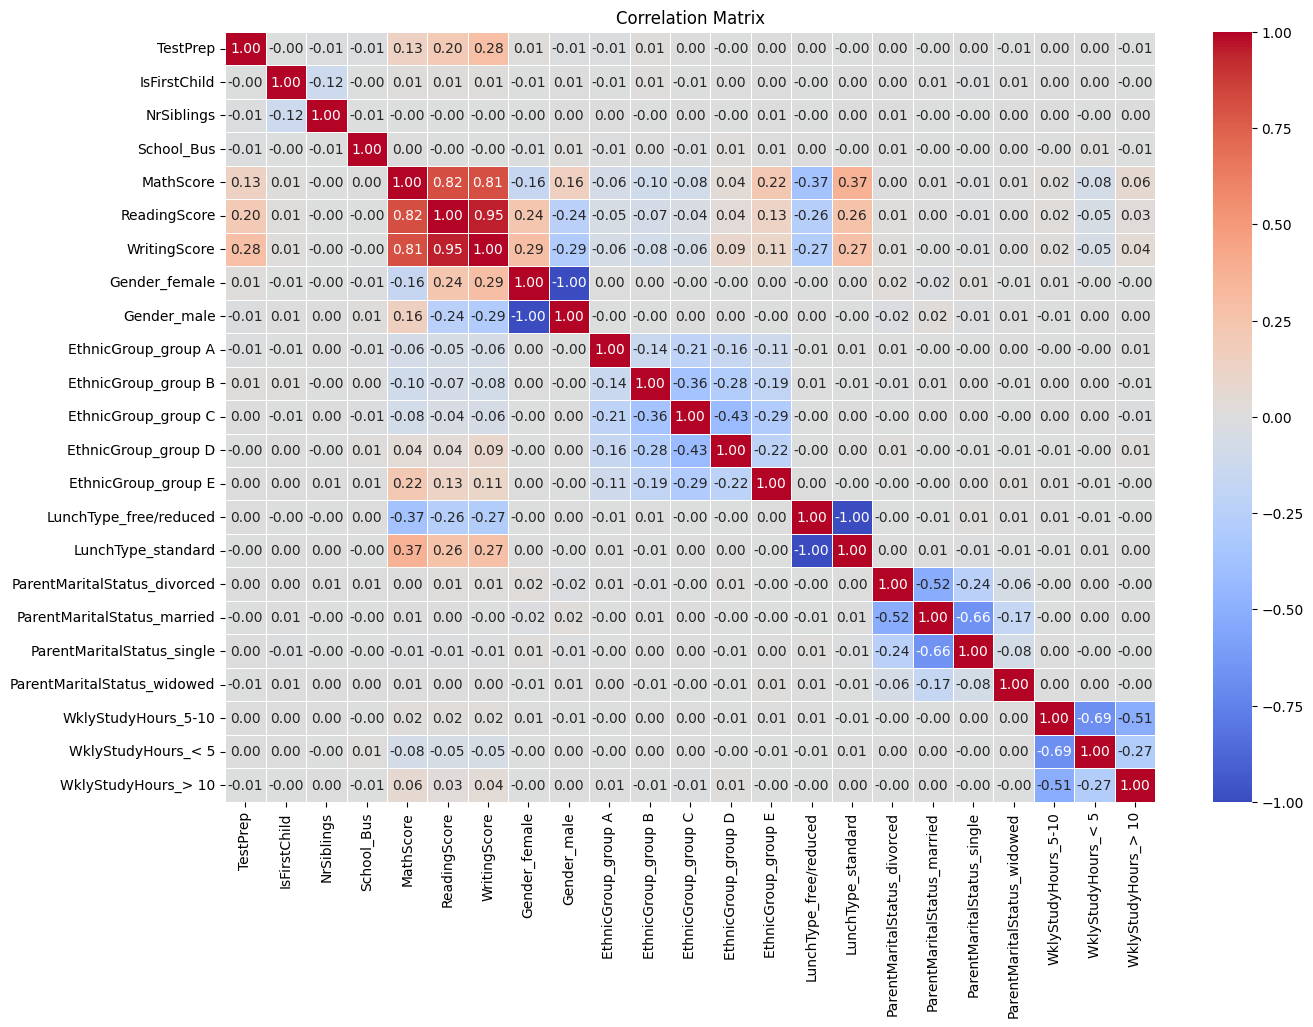

In [52]:
# correlation matrix
correlation_matrix = data2.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [53]:
#Correlation matrix for each subject

In [54]:
data1 = data.copy()

for column in ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'ParentMaritalStatus', 'PracticeSport', 'WklyStudyHours']:
    data1 = perform_one_hot_encoding(data1, column)


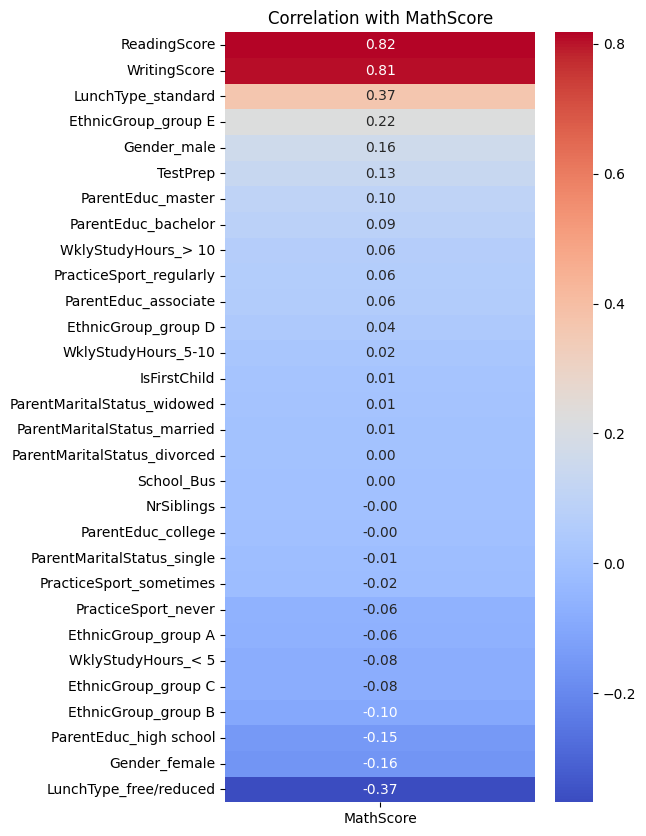

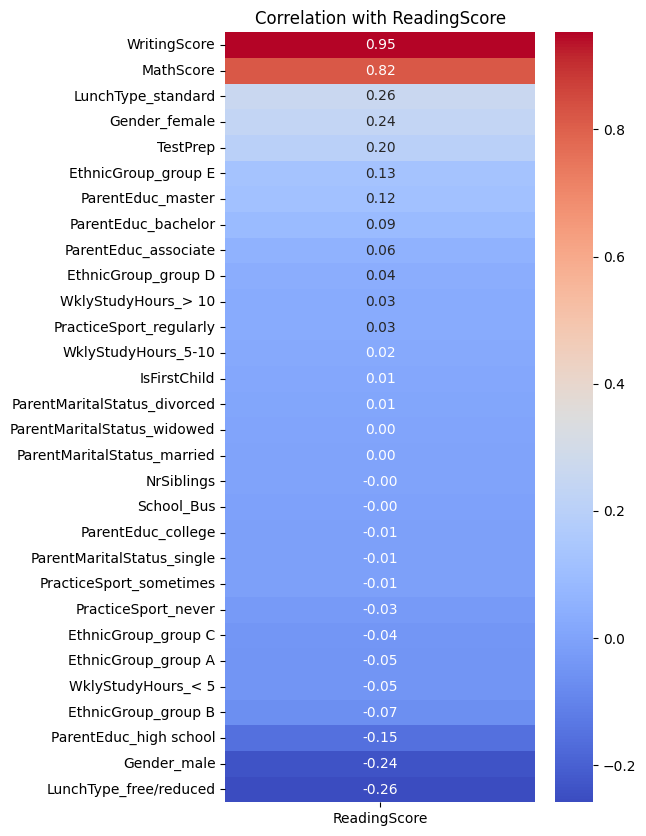

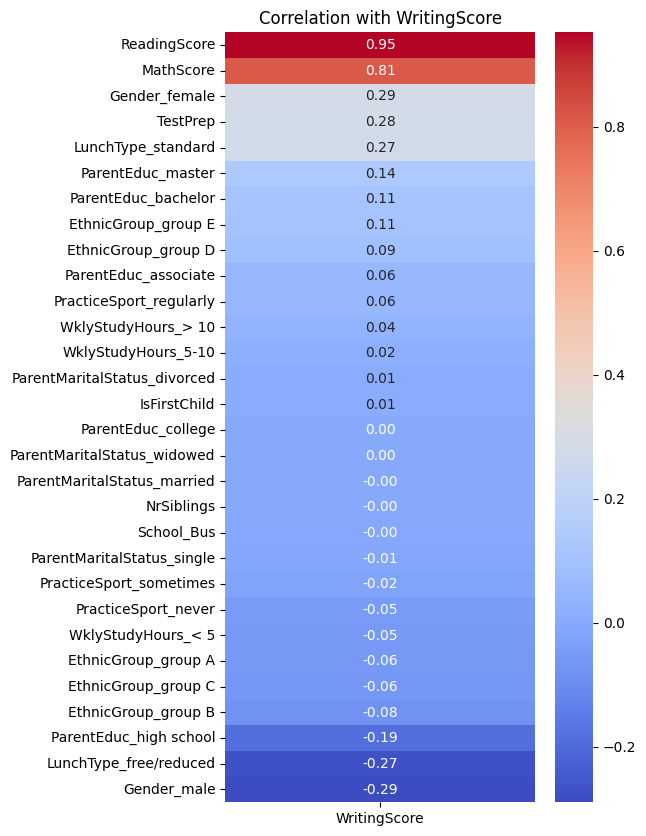

In [55]:
for score_column in ['MathScore', 'ReadingScore', 'WritingScore']:
    # heatmap
    corr = data1.corr()
    target_corr = corr[score_column].drop(score_column)

    # Sort
    target_corr_sorted = target_corr.sort_values(ascending=False)

    plt.figure(figsize=(5, 10))
    sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
    plt.title(f'Correlation with {score_column}')
    plt.show()

## Kết quả trên cho thấy trong dataset này:

- Điểm của mỗi môn (toán, đọc, viết) có tương thông (correlated) lớn. Học sinh giỏi một môn nào thì có xu hướng cũng đạt điểm cao ở các môn khác.
- Học sinh nữ giỏi môn đọc và viết hơn, trong khi học sinh nam thường có điểm toán cao hơn.
- Học sinh nào có chuẩn bị bài (TestPrep) thì có xu hướng được điểm cao trong các môn học.
- Tuy dường như không quan trọng lắm, nhưng loại bữa trưa (LunchType) lại correlate với điểm của học sinh hơn nhiều yếu tố khác. Học sinh nào có bữa ăn tiêu chuẩn (standard) thường có điểm cao hơn hẳn học sinh có bữa ăn trưa rẻ/ miễn phí (free/reduced) tại trường. Có thể điều này thể hiện khác biệt về điều kiện kinh tế.
- Học sinh thuộc ethic group E có thành tích hơn hẳn so với các group còn lại.
- Cha mẹ học cao (có bằng thạc sĩ, cử nhân) thì con của họ có xu hướng điểm cao.
- Thường xuyên chơi thể thao cũng có ảnh hưởng tích cực với điểm, có thể vì những bạn hay chơi thể thao thì có cơ thể và tinh thần khỏe mạnh.
- WklyStudyHours: dành nhiều giờ để học hơn tỉ lệ thuận với điểm (ảnh hưởng nhỏ)
- IsFirstChild: Học sinh là con cả trong gia đình cũng thường có điểm cao hơn (ảnh hưởng nhỏ)
- Trái với dự đoán ban đầu, tình trạng hôn nhân của cha mẹ không ảnh hưởng lớn tới điểm.

## 3. Using linear regression to predict scores

### Mapping

In [57]:
df = pd.DataFrame()

df['Gender Label'] = data['Gender'].map({'female':0 , 'male':1})
df['Ethnic Label'] = data['EthnicGroup'].map({'group A': 0, 'group B':1, 'group C':2, 'group D':3, 'group E':4})
df['ParEdu Label'] = data['ParentEduc'].map({"bachelor":0, 'college':1, "master":2,
       "associate":3, 'high school':4})
df['Lunch Label']  = data['LunchType'].map({'standard':0, 'free/reduced':1})
df['Test Label']  = data['TestPrep']
df['Sport Label'] = data['PracticeSport'].map({'never':0, 'sometimes':1, 'regularly':2})
df['Hour Label'] = data['WklyStudyHours'].map({'< 5':0, '5-10':1, '> 10':2})
df['MathScore'] = data['MathScore']
df['ReadingScore'] = data['ReadingScore']
df['WritingScore'] = data['WritingScore']


df.head()


,Gender Label,Ethnic Label,ParEdu Label,Lunch Label,Test Label,Sport Label,Hour Label,MathScore,ReadingScore,WritingScore
0,0,2,0,0,0,2,0,71,71,74
1,0,2,1,0,0,1,1,69,90,88
2,0,1,2,0,0,1,0,87,93,91
3,1,0,3,1,0,0,1,45,56,42
4,1,2,1,0,0,1,1,76,78,75


### Predict each score
MathScore

In [58]:
#Using 'ReadingScore', 'WritingScore' and most other related atributes
X = df.drop(['MathScore'], axis = 1)
y = df['MathScore']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= .2)
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

math_score_1 = model.score(X_test, y_test)

#Using 'ReadingScore', 'WritingScore', gender, lunchtype 
X = df[['ReadingScore', 'WritingScore','Gender Label']]
y = df['MathScore']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= .2)
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

math_score_2 = model.score(X_test, y_test)


#Without Using 'ReadingScore', 'WritingScore'
X = df.drop(['MathScore', 'ReadingScore', 'WritingScore'], axis = 1)
y = df['MathScore']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= .2)
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

math_score_3 = model.score(X_test, y_test)

Reading Score, Writing Score similarly

In [59]:
#
X = df.drop(['ReadingScore'], axis = 1)
y = df['ReadingScore']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= .2)
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

read_score_1 = model.score(X_test, y_test)

#
X = df[['MathScore', 'WritingScore','Gender Label']]
y = df['ReadingScore']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= .2)
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

read_score_2 = model.score(X_test, y_test)


#
X = df.drop(['MathScore', 'ReadingScore', 'WritingScore'], axis = 1)
y = df['ReadingScore']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= .2)
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

read_score_3 = model.score(X_test, y_test)

#
X = df.drop(['WritingScore'], axis = 1)
y = df['WritingScore']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= .2)
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

writing_score_1 = model.score(X_test, y_test)

#
X = df[['MathScore', 'ReadingScore','Gender Label']]
y = df['WritingScore']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= .2)
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

writing_score_2 = model.score(X_test, y_test)


#
X = df.drop(['MathScore', 'ReadingScore', 'WritingScore'], axis = 1)
y = df['WritingScore']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= .2)
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

writing_score_3 = model.score(X_test, y_test)

In [61]:
accuracy = { 
    'Accuracy': ['Writing Score', 'Reading Score', 'Math Score'],
    'Using_most_atributes' : [writing_score_1,read_score_1,math_score_1],
    'Using other_scores_gender'   : [writing_score_2, read_score_2, math_score_2],
    'Without_other_scores'   : [writing_score_3, read_score_3, math_score_3]
        }

result = pd.DataFrame(accuracy)
result

,Accuracy,Using_most_atributes,Using other_scores_gender,Without_other_scores
0,Writing Score,0.936813,0.925172,0.298023
1,Reading Score,0.920523,0.917340,0.198067
2,Math Score,0.867858,0.836313,0.248340


### Visualisation

In [72]:
accuracy = {
    'Using_most_atributes' : [round(writing_score_1,3),round(read_score_1,3),round(math_score_1,3)],
    'Using other_scores_and_gender'   : [round(writing_score_2,3),round(read_score_2,3),round(math_score_2,3)],
    'Without_other_scores'   : [round(writing_score_3,3),round(read_score_3,3),round(math_score_3,3)]
        }

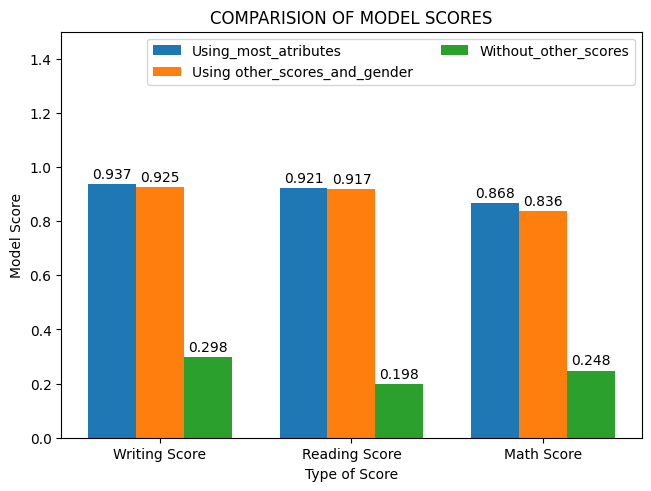

In [73]:
x = np.arange(3)
width = 0.25 
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in accuracy.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=2)
    multiplier += 1

ax.set_xlabel('Type of Score')
ax.set_ylabel('Model Score')
ax.set_title('COMPARISION OF MODEL SCORES')
ax.set_xticks(x + width, ('Writing Score', 'Reading Score', 'Math Score'))
ax.legend(loc='upper right', ncols=2)
ax.set_ylim(0, 1.5)

plt.show()